# Finding Dominant Colors in an Image

This problem requires finding the dominant colors in an image. It is an unsupervised learning problem. I attempt to solve it by two methods, using:
1. K-Means Clustering
2. SOM Clustering

Later on, I also show how to quantize the image to show the image only with its dominant colors.

## Importing Packages

This section imports all the required packages for processing.

In [182]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import math

##Reading Assignment Image

This step reads the image.

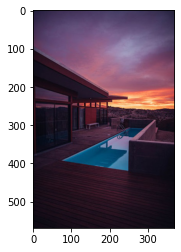

In [183]:
img = plt.imread("dominant-colors.jpg")
plt.imshow(img)

## Creating Data from Image

In [184]:
data=img.reshape(img.shape[0]*img.shape[1],3)
data.shape

(210530, 3)

## Visualize Data

Text(0, 0.5, 'G')

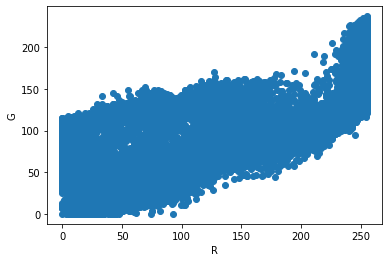

In [185]:
plt.scatter(data.T[0,:],data.T[1,:])
plt.xlabel('R')
plt.ylabel('G')

## Normalize Data

In [186]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

## K-Means Clustering Implementation

In [187]:
from sklearn.cluster import KMeans

### Select the best K (Number of clusters)


#### Elbow Method

How **Sum of Squared Error** changes as K changes in Kmeans

In [188]:
sse = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

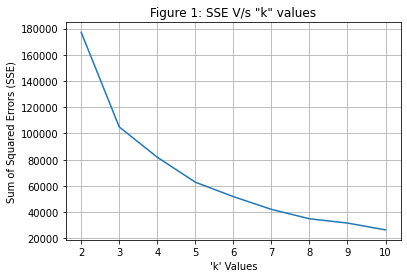

In [189]:
plt.plot([i for i in range(2,11)],sse)
plt.title('Figure 1: SSE V/s "k" values')
plt.xlabel("'k' Values")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()

#### Choosing the best **k**

According to the figure 1, SSE value drops sharply till **k=4**, after which SSE drop becomes gradually slower. Finally, after **k=9**, there is very less change. Thus, the best **k=4**.

In [190]:
best_k=4

### K-means with best **k**


In [191]:
# Number of clusters
kmeans = KMeans(n_clusters=best_k,init='random')
# Fitting the input data
kmeans = kmeans.fit(scaled_data)
# Getting the cluster labels
clusters_assigned = kmeans.predict(scaled_data)
# Centroid values
centroids = kmeans.cluster_centers_

#### Number of Iterations K-means run for

In [192]:
print("Number of iterations, run by k-means: ",kmeans.n_iter_)
print("Sum of Squared Errors: ",kmeans.inertia_)

Number of iterations, run by k-means:  10
Sum of Squared Errors:  77093.3437088971


#### Visualizing Clusters Assigned

In [193]:
def visualize_data(scaled_data, clusters_assigned):
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,1)
  plt.scatter(scaled_data[1,:],scaled_data[0,:],c=clusters_assigned)
  plt.xlabel('G')
  plt.ylabel('R')
  plt.subplot(1,3,2)
  plt.scatter(scaled_data[2,:],scaled_data[0,:],c=clusters_assigned)
  plt.xlabel('B')
  plt.ylabel('R')
  plt.subplot(1,3,3)
  plt.scatter(scaled_data[2,:],scaled_data[1,:],c=clusters_assigned)
  plt.xlabel('B')
  plt.ylabel('G')

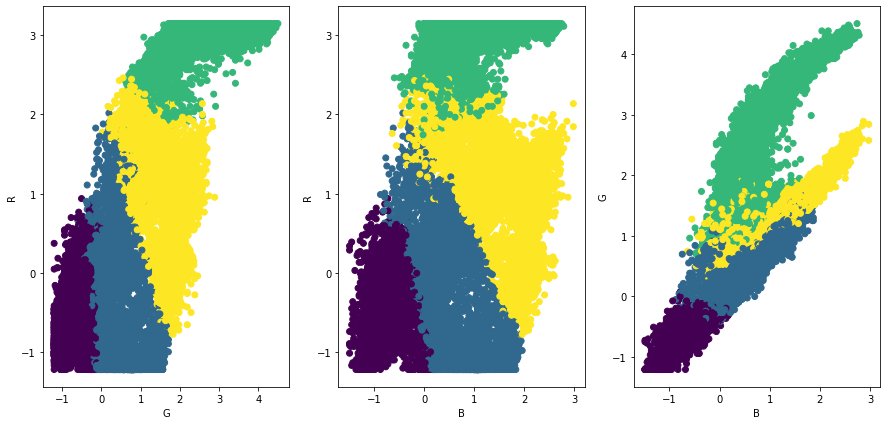

In [194]:
visualize_data(scaled_data.T,clusters_assigned)

### Conclusion

From the above K-means clustering with the best-k, we find that there are 4 dominant colors which can be used to represent the colors of the image as shown below.

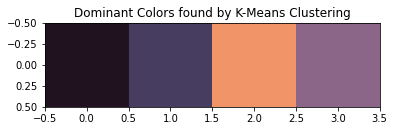

In [195]:
dominant_colors = []
for centroid in scaler.inverse_transform(centroids).astype(int):
  dominant_colors.append(centroid)
plt.title('Dominant Colors found by K-Means Clustering')
plt.imshow([dominant_colors])
plt.show()

## SOM

### Installing dependency

In [197]:
!pip install minisom

### Importing Dependencies

In [198]:
from minisom import MiniSom

### Rigorous Checking for Perceptron Grid

This block of code applies brute-force to find the best grid, which will allow minimum quantization error.

In [199]:
quantization_error_res = {"SOM Grid":[], "Quantization Error":[]}

for i in range(1,11):
  for j in range(1,11):
    print(f"Perceptron Grid: {i} X {j}")
    Color_Model = MiniSom(i, j, 3, sigma=0.1, learning_rate=0.2)
    Color_Model.train(scaled_data, 10000,verbose=True,)
    quantization_error_res['SOM Grid'].append((i,j))
    quantization_error_res['Quantization Error'].append(Color_Model.quantization_error(scaled_data))


Perceptron Grid: 1 X 1
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.5346743507830773
Perceptron Grid: 1 X 2
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.2940310452897938
Perceptron Grid: 1 X 3
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.5137337515497882
Perceptron Grid: 1 X 4
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.4507366557514696
Perceptron Grid: 1 X 5
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.4387983347270312
Perceptron Grid: 1 X 6
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.933185289511548
Perceptron Grid: 1 X 7
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.9613895652476165
Perceptron Grid: 1 X 8
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.0086274494884466
Perceptron Grid: 1 X 9
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7905854032858795
Perceptron Grid: 1 X 10
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantizat

### Trail-n-Error Testing for the best grid of Perceptrons

Experimented Perceptron Grids:

          Perceptron Grid      Quantization Error
1. **1 x 3** perceptrons ->     **1.5046375118376525**
2. **2 x 3** perceptrons ->     **1.1734020573960935**
3. **3 x 3** perceptrons ->     **0.8734768385091572**
4. **1 x 4** perceptrons ->     **1.1905145310514689**
5. **2 x 4** perceptrons ->     **0.8822369777929933**
6. **3 x 4** perceptrons ->     **0.8788445370858396**
7. **4 x 4** perceptrons ->     **0.8077909235641293**
8. **1 x 5** perceptrons ->     **1.2136102767552357**
9. **2 x 5** perceptrons ->     **1.2797186568416454**
10. **3 x 5** perceptrons ->     **1.1754542280909963**
11. **4 x 5** perceptrons ->     **0.7066405173513064**
12. **5 x 5** perceptrons ->     **0.731026029162457**
13. **5 x 4** perceptrons ->     **0.7625080423909136**
14. **6 x 4** perceptrons ->     **0.8011692588662066**
15. **7 x 4** perceptrons ->     **0.7201207160336885**
16. **6 x 5** perceptrons ->     **0.7443784941064501**
17. **7 x 5** perceptrons ->     **0.8738909909475842**
18. **7 x 7** perceptrons ->     **0.7772782654069424**
19. **8 x 8** perceptrons ->     **0.6982866371771987**
20. **10 x 10** perceptrons ->     **0.6950012810800891**




### Choosing Best Perceptron Grid:

#### Converting Results to a DataFrame

In [200]:
#Converting Results to DataFrame
quantization_error_res_df = pd.DataFrame(quantization_error_res)

In [201]:
#Printing converted dataframe in ascending order
quantization_error_res_df.sort_values('Quantization Error', ascending=True)

,SOM Grid,Quantization Error
97,"(10, 8)",0.690924
99,"(10, 10)",0.691046
58,"(6, 9)",0.697596
78,"(8, 9)",0.709862
49,"(5, 10)",0.710285
...,...,...
3,"(1, 4)",1.450737
11,"(2, 2)",1.461373
2,"(1, 3)",1.513734
10,"(2, 1)",1.515487


#### Choosing the Best Grid, with minimum quantization error.

In [202]:
best_perceptron_grid = quantization_error_res_df[quantization_error_res_df['Quantization Error'] == quantization_error_res_df['Quantization Error'].min()].iloc[0]
print(f"The best perceptron grid is {best_perceptron_grid['SOM Grid']}, with quantization error: {best_perceptron_grid['Quantization Error']}")
best_perceptron_grid = best_perceptron_grid['SOM Grid']

The best perceptron grid is (10, 8), with quantization error: 0.6909240925920974


### Testing with the best perceptron grid found

In [203]:
max_iter = 2

#### Training and Converging to best SOM

Training and converging on the best SOM grid:

Training model for Grid: (10, 8)
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7121670484578637
Activation Responses of Perceptrons for Grid (10, 8) are:
 [[3.65000e+02 0.00000e+00 0.00000e+00 3.60000e+01 1.50000e+01 2.80000e+01
  2.19400e+03 0.00000e+00]
 [2.70000e+01 3.00000e+00 8.69800e+03 5.72800e+03 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00]
 [1.83800e+03 0.00000e+00 5.92000e+03 1.90000e+01 5.79000e+02 0.00000e+00
  9.00000e+00 6.80000e+01]
 [0.00000e+00 1.76190e+04 5.40000e+01 3.54600e+03 4.02000e+02 9.96000e+02
  0.00000e+00 0.00000e+00]
 [5.75000e+03 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 9.05200e+03
  2.00000e+00 0.00000e+00]
 [5.00000e+00 0.00000e+00 0.00000e+00 3.31660e+04 1.01944e+05 3.40000e+01
  0.00000e+00 1.00000e+00]
 [0.00000e+00 0.00000e+00 1.01000e+03 2.00000e+01 0.00000e+00 0.00000e+00
  3.77500e+03 0.00000e+00]
 [0.00000e+00 3.40000e+01 1.90000e+01 2.00000e+00 5.20000e+01 0.00000e+00


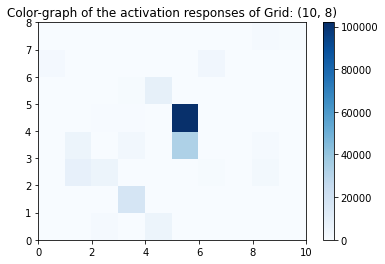


Training model for Grid: (3, 3)
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8423527194250734
Activation Responses of Perceptrons for Grid (3, 3) are:
 [[4.8670e+03 3.6511e+04 3.8700e+02]
 [7.5060e+04 2.2900e+04 5.0400e+02]
 [1.1600e+02 6.2000e+01 7.0123e+04]]



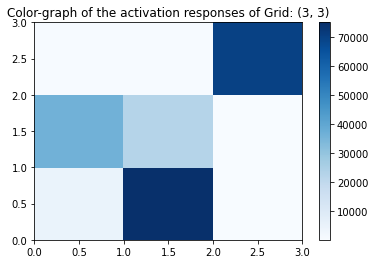

In [204]:
grid = best_perceptron_grid

print('Training and converging on the best SOM grid:')
prev_grid = None
iter = 0
while grid != prev_grid and iter < max_iter:  
  # Training Model
  print(f'\nTraining model for Grid: {grid}')
  Color_Model = MiniSom(grid[0], grid[1], 3, sigma=0.1, learning_rate=0.2)
  Color_Model.train(scaled_data, 10000,verbose=True,)
  # Storing Activation Responses
  result=Color_Model.activation_response(scaled_data)
  print(f"Activation Responses of Perceptrons for Grid {grid} are:\n",result)
  print()
  #Plotting Color-graph of the activation response
  plt.figure()
  plt.title(f'Color-graph of the activation responses of Grid: {grid}')
  plt.pcolor(result.T, cmap='Blues')   
  plt.colorbar()
  plt.show()

  #Storing previous grid
  prev_grid = grid

  # Interpreting Activation Responses
  n_result = result.reshape(result.shape[0]*result.shape[1])
  result_sqrt = math.sqrt(len(n_result[n_result > 0]))
  temp = 0
  if result_sqrt % 1 > 0:
    result_sqrt = int(result_sqrt)
    temp = 1
    while math.sqrt(result_sqrt + temp) % 1 > 0:
      temp += 1
    result_sqrt = int(math.sqrt(result_sqrt +  temp))
  grid = (result_sqrt, result_sqrt)

  iter += 1

### Counting the winner perceptron for each data point

In [205]:
SOM_Cluster=[]
for record in scaled_data:
  SOM_Cluster.append(Color_Model.winner(record))

#### Computing SOM cluster indexes

In [206]:
SOM_Cluster_index=[coordiate[0]*best_perceptron_grid[0]+coordiate[1] for coordiate in SOM_Cluster]

### Plotting the clusters found

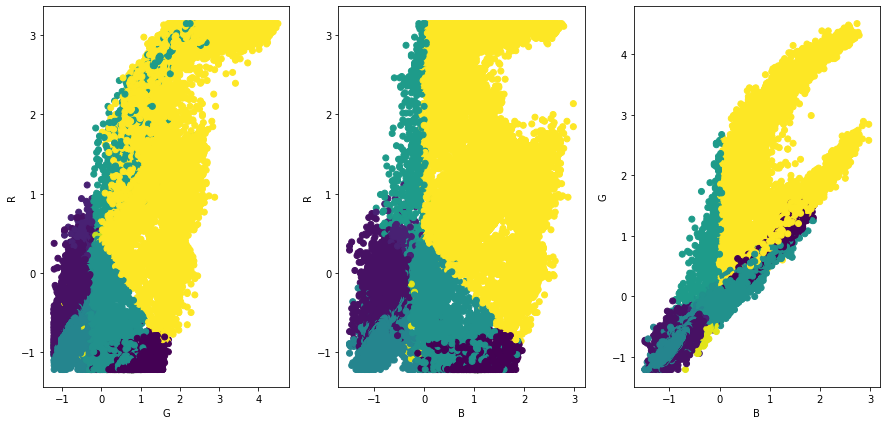

In [207]:
visualize_data(scaled_data.T, SOM_Cluster_index)

### Conclusion

From the above SOM clustering, we find that there are 9 dominant colors which can be used to represent the colors of the image as shown below.

In [208]:
weights = Color_Model._weights.reshape(Color_Model._weights.shape[0] * Color_Model._weights.shape[1], Color_Model._weights.shape[2])

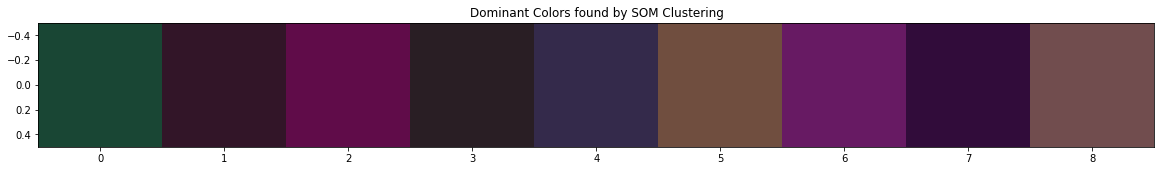

In [209]:
dominant_colors = []
for centroid in scaler.inverse_transform(weights).astype(int):
  dominant_colors.append(centroid)
plt.figure(figsize = (20,10))
plt.title('Dominant Colors found by SOM Clustering')  
plt.imshow([dominant_colors])
plt.show()

## Quantizing Image

In [210]:
scaled_data_qnt=Color_Model.quantization(scaled_data)
scaled_data_qnt.shape

(210530, 3)

### Applying Quantization to image

The following blocks of code represent the quantized image by the least amount of colors found by the above model.

#### Inverse Transform the Quantized data

In [211]:
data_qnt=scaler.inverse_transform(scaled_data_qnt)

#### Reshaping the data points to an image of the original dimensions

In [212]:
img_qnt=data_qnt.reshape(img.shape[0],img.shape[1],3)

#### Plotting the original image, as represented by the least number of colors

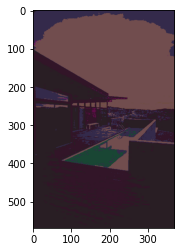

In [213]:
plt.imshow(img_qnt.astype(int))

## Conclusion

The dominant colors found by the clustering methods are displayed and the original image is shown with just the dominant colors.